In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

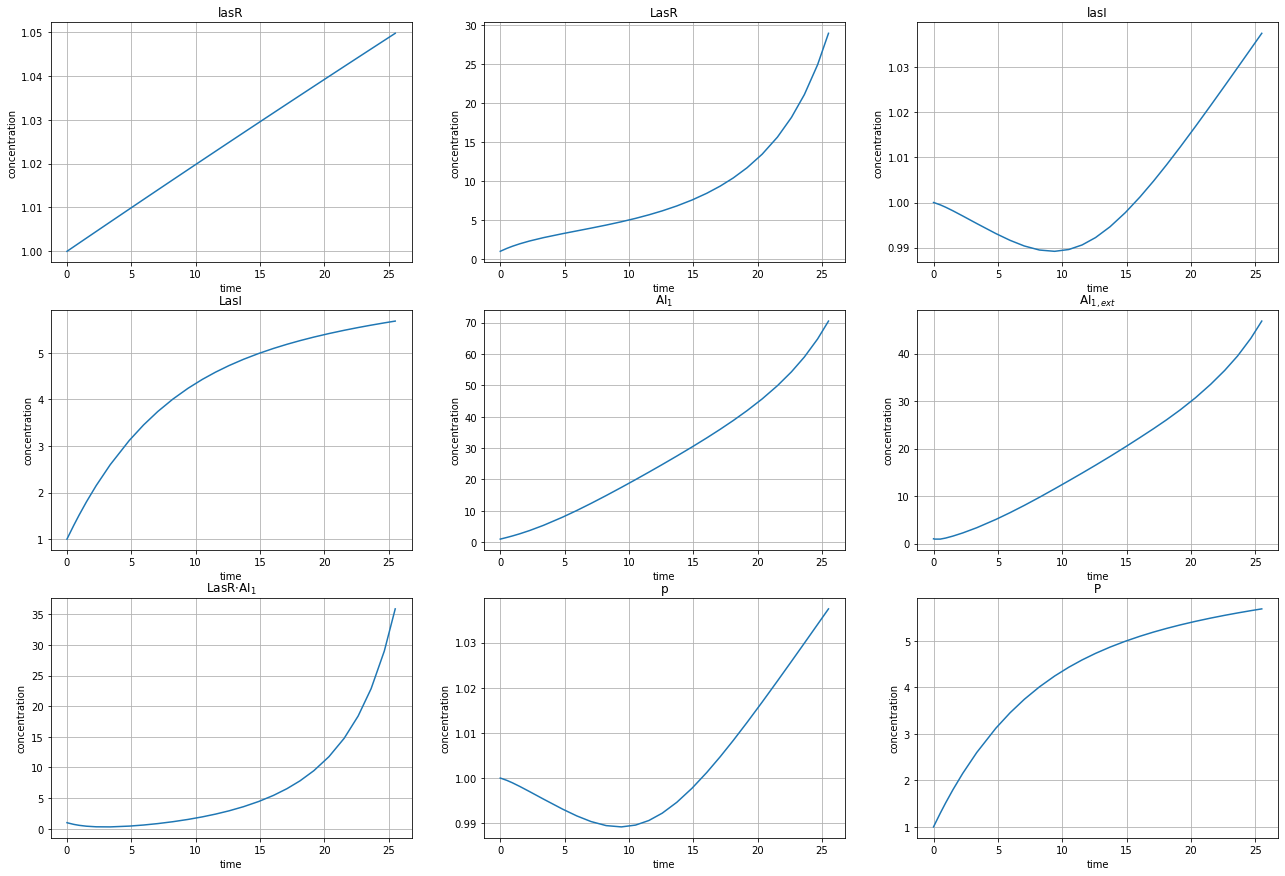

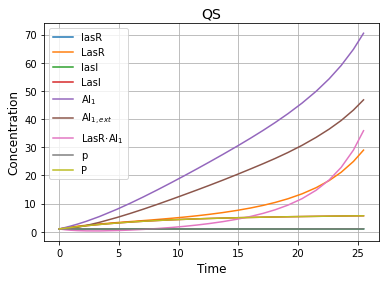

In [2]:
def qs_deterministic_model(t, r):
    # 
    lasR, LasR, lasI, LasI, AI1, AI1_ext, LasRAI1, p, P = r
    
    k_lasR = 0.004
    g_lasR = 0.002
    k_LasR = 0.7
    g_LasR = 0.15
    a_lasI = 0.00036
    b_lasI = 0.0058
    K1 = 2.4
    h1 = -2
    g_lasI = 0.002
    k_LasI = 0.7
    g_LasI = 0.12
    k_AI1 = 0.8
    g_AI1 = 0.02
    k_LasRAI1 = 0.016
    g_LasRAI1 = 0.40
    s_LasRAI1 = 0.25
    d = 0.2
    N = 10
    d_away = 0.9
    g_AI1_ext = 0.01
    a_p = 0.00036
    b_p = 0.0058
    K2 = 2.4
    h2 = -2
    g_p = 0.002
    k_P = 0.7
    g_P = 0.12
    
    dlasR = k_lasR - lasR*g_lasR
    dLasR = lasR*k_LasR + LasRAI1*s_LasRAI1 - LasR*g_LasR
    dlasI = a_lasI + (b_lasI/(1+(LasRAI1/K1)**h1)) - lasI*g_lasI
    dLasI = lasI*k_LasI - LasI*g_LasI
    dAI1 = LasI*k_AI1 + LasRAI1*s_LasRAI1 - (d*(AI1-AI1_ext)) - AI1*g_AI1
    dAI1_ext = (N*d*(AI1-AI1_ext)) - (AI1_ext*(g_AI1_ext + d_away))
    dLasRAI1 = AI1*LasR*k_LasRAI1 - (LasRAI1*(g_LasRAI1 + s_LasRAI1))
    dp = a_p + (b_p/(1+(LasRAI1/K2)**h2)) - p*g_p
    dP = p*k_P - P*g_P
    
    return np.array([dlasR, dLasR, dlasI, dLasI, dAI1, dAI1_ext, dLasRAI1, dp, dP])

lasR = 1
LasR = 1
lasI = 1
LasI = 1
AI1 = 1
AI1_ext = 1
LasRAI1 = 1
p = 1
P = 1

qs_deterministic_dynamics = solve_ivp(qs_deterministic_model, [0, 25.5], [lasR, LasR, lasI, LasI, AI1, AI1_ext, LasRAI1, p, P])

plt.figure(figsize=(22,15))
plt.subplot(3,3,1)
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[0], label='lasR')
plt.title('lasR')
plt.xlabel('time')
plt.ylabel('concentration')
plt.grid()
plt.subplot(3,3,2)
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[1], label='LasR')
plt.title('LasR')
plt.xlabel('time')
plt.ylabel('concentration')
plt.grid()
plt.subplot(3,3,3)
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[2], label='lasI')
plt.title('lasI')
plt.xlabel('time')
plt.ylabel('concentration')
plt.grid()
plt.subplot(3,3,4)
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[3], label='LasI')
plt.title('LasI')
plt.xlabel('time')
plt.ylabel('concentration')
plt.grid()
plt.subplot(3,3,5)
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[4], label='AI$_1$')
plt.title('AI$_1$')
plt.xlabel('time')
plt.ylabel('concentration')
plt.grid()
plt.subplot(3,3,6)
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[5], label='AI$_{1,ext}$')
plt.title('AI$_{1,ext}$')
plt.xlabel('time')
plt.ylabel('concentration')
plt.grid()
plt.subplot(3,3,7)
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[6], label='LasR$\cdot$AI$_1$')
plt.title('LasR$\cdot$AI$_1$')
plt.xlabel('time')
plt.ylabel('concentration')
plt.grid()
plt.subplot(3,3,8)
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[7], label='p')
plt.title('p')
plt.xlabel('time')
plt.ylabel('concentration')
plt.grid()
plt.subplot(3,3,9)
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[8], label='P')
plt.title('P')
plt.xlabel('time')
plt.ylabel('concentration')
plt.grid()
plt.show()

plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[0], label='lasR')
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[1], label='LasR')
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[2], label='lasI')
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[3], label='LasI') 
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[4], label='AI$_1$')
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[5], label='AI$_{1,ext}$')
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[6], label='LasR$\cdot$AI$_1$')
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[7], label='p')
plt.plot(qs_deterministic_dynamics.t, qs_deterministic_dynamics.y[8], label='P')
plt.grid()
plt.legend(loc=0)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Concentration', fontsize=12)
plt.title('QS', fontsize=14)
plt.show()